<a href="https://colab.research.google.com/github/harshbhanderi/Goole-Play-Store-Data-Analysis/blob/master/Project1_HarshBhanderi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Google playstore data 2016

#### -- Harsh Bhanderi

#### Answer I want to find from dataset is whether people have same tendency of downloading different types of applications over free and paid app versions.

## Importing Data Into Pandas Data Frame

In [0]:
import os
os.getcwd()

'C:\\Users\\Harsh Bhanderi\\Downloads\\data601\\Project 1'

In [0]:
import pandas as pd
pd.__version__

'0.24.2'

### Importing data into pandas dataframe df

In [0]:
df = pd.read_csv('googleplaystore.csv')

#### Sample data

In [0]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4597,T-Mobile DIGITS,COMMUNICATION,3.0,1820,33M,"100,000+",Free,0,Everyone,Communication,15-Feb-18,1.1.50,4.4 and up
4916,AC Remote for Haier - NOW FREE,TOOLS,3.9,336,27M,"50,000+",Free,0,Everyone,Tools,30-Jul-18,6.1.7,4.2 and up
10157,EZ LED,TOOLS,2.2,19,2.1M,"1,000+",Free,0,Everyone,Tools,5-Sep-17,1.1,4.3 and up
990,Laugh Out Loud by Kevin Hart,ENTERTAINMENT,4.3,1856,20M,"100,000+",Free,0,Teen,Entertainment,1-Aug-18,1.6.1,6.0 and up
10399,Familial Hypercholesterolaemia,MEDICAL,NaN,0,34M,10+,Free,0,Everyone,Medical,5-Jul-18,2.0.1,4.1 and up
6370,Keyboard Theme Dusk BK Purple,PERSONALIZATION,4.5,248,2.8M,"10,000+",Free,0,Mature 17+,Personalization,23-May-16,9,4.0.3 and up
6143,Zdravei.BG,SOCIAL,NaN,6,6.1M,"1,000+",Free,0,Mature 17+,Social,8-Jan-18,3.7.17,4.1 and up
9617,Squadron - Bullet Hell Shooter,GAME,4.2,177542,40M,"10,000,000+",Free,0,Everyone,Arcade,2-May-16,1.0.7,2.3 and up
2268,Medical terms (OFFLINE),MEDICAL,4.4,104,38M,"1,000+",Paid,$2.99,Teen,Medical,24-May-18,3.2.0,4.1 and up
5892,First Credit Union (AZ) Mobile,FINANCE,3.5,100,11M,"10,000+",Free,0,Everyone,Finance,13-Jun-17,3.0.830,4.0 and up


#### Number of Columns and Rows in Dataset

In [0]:
df.shape

(10841, 13)

#### Data types of columns

In [0]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Data cleaning

In [0]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

#### There should not be any application type as '0', because Application types are either 'Free' or 'Paid' only

#### So, I have to find the row number of this Type = '0' data

In [0]:
df.index[df.Type == '0']

Int64Index([10472], dtype='int64')

#### The wrong data is coming from row number : 10472
#### So, Let's check the data around row 10472 from range : 10470 to 10475

In [0]:
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up


#### The data needs to be shifted right from column 'Category' to 'Android Version' in row 10472

In [0]:
df.iloc[10472,1:] = df.iloc[10472,1:].shift(1)
df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,10-Feb-17,0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,5-Aug-14,3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19,3.0M,"1,000+",Free,0,Everyone,NaN,11-Feb-18,1.0.19,4.0 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,7-Aug-18,6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,21-Nov-14,2.2.1.5,2.2 and up


### Now, I try to convert column data types from object to numeric for columns 'Rating', 'Reviews', 'Size', 'Installs' and 'Price'

In [0]:
df['Rating'] = pd.to_numeric(df['Rating'])

In [0]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [0]:
df['Size'] = pd.to_numeric(df['Size'])

ValueError: Unable to parse string "19M" at position 0

#### There is an error showing that '19M' can't be converted into numeric value, So I should remove 'M' from every rows in column 'Size'

In [0]:
import numpy as np

df['Size'] = df['Size'].map(lambda x: x.rstrip('M'))

In [0]:
df['Size'] = pd.to_numeric(df['Size'])

ValueError: Unable to parse string "Varies with device" at position 37

#### There are so many values 'Varies with device' in Size columns, for that I am putting NaN values for these with Numpy

In [0]:
df['Size'] = df['Size'].map(lambda x: np.nan if x.startswith('Varies') else x)

In [0]:
df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

#### Like 'Size', In 'Install' column I should remove '+' and ',' signs to make it numeric field

In [0]:
# This is another type of replace a string with another string with using simple replace function

df['Installs'] = df['Installs'].str.replace('+','')
df['Installs'] = df['Installs'].str.replace(',','')

In [0]:
df['Installs'] = pd.to_numeric(df['Installs'])

#### Column 'Price' also have '$' sign in values 

In [0]:
df['Price'] = df['Price'].str.replace('$','')
df['Price'] = pd.to_numeric(df['Price'])

#### Now, everything looks good for plotting, some are numeric fields others are strings

In [0]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Data Visualization

### At first, from dataset I found that there is huge difference between total number of application by different 'Category' of apps.

In [0]:
df.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

#### Most of application on Google play store are from 'Family', 'Games' and 'Tools' categories.
#### Let's plot this categories and their count in a bar plot

In [0]:
# Import seaborn and matplotlib for plotting

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'3.1.0'

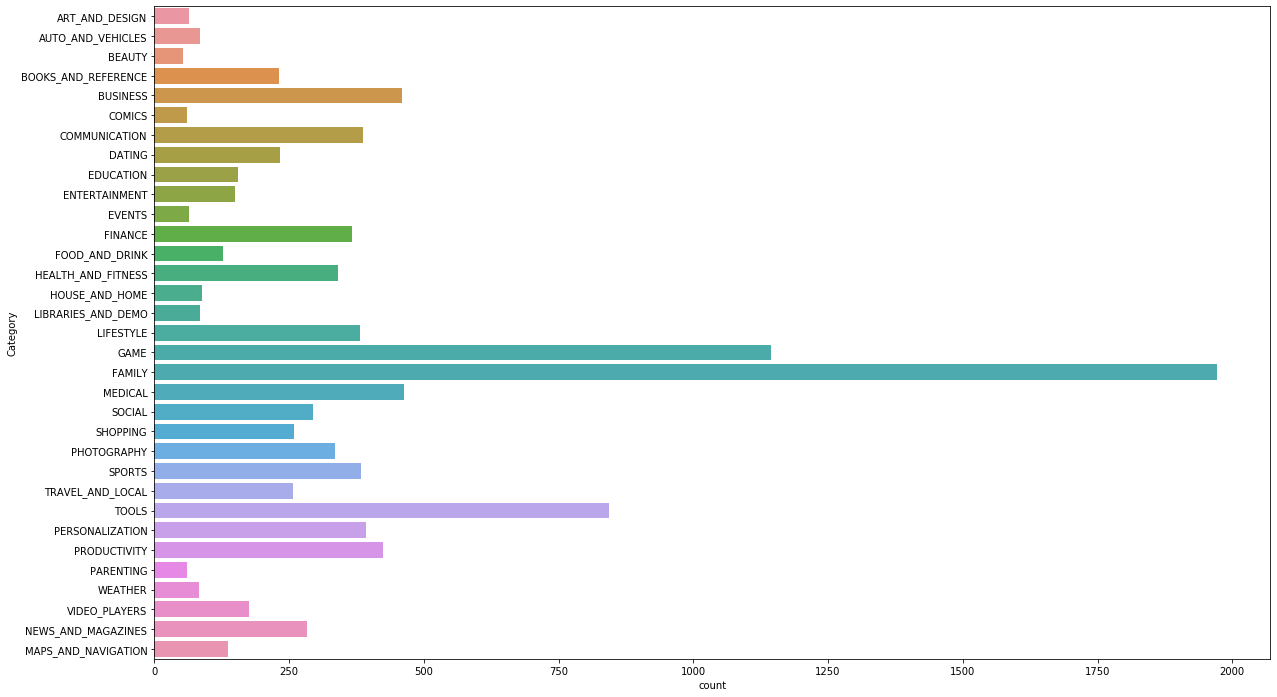

In [0]:
# Set the plot size according to data, then by seaborn I plotted countplot for Categories on Y axis with data frame df

plt.figure(figsize=(20,12))
sns.countplot(y='Category',data=df)
plt.show()

### By digging into data set, I want to find whether people tend to have different choices for installing apps on 'Free' and 'Paid' applications ??

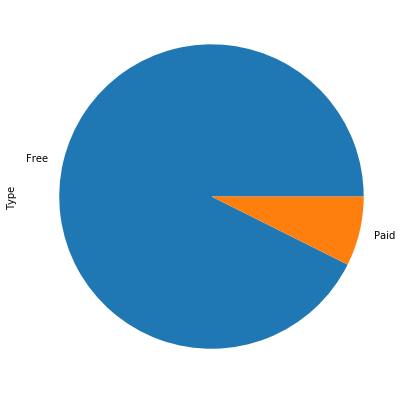

In [0]:
df['Type'].value_counts().plot(kind='pie', figsize=(7, 7))

#### There is a huge difference between number of applications that are 'Free' and 'Paid'

#### To compare the data between these two types, I divided the data in two different data frames for Paid and Free apps

In [0]:
df_free = df[df['Type'] == 'Free']
df_paid = df[df['Type'] == 'Paid']

In [0]:
df_paid.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5341,Al'Quran Bahasa Indonesia PRO,BOOKS_AND_REFERENCE,4.7,1340.0,11.0,10000,Paid,4.49,Everyone,Books & Reference,16-May-18,4.0.5,2.2 and up
9211,RPG ブレイジング ソウルズ アクセレイト,FAMILY,3.4,159.0,3.1,1000,Paid,10.99,Teen,Role Playing,26-Apr-18,2.12,2.3 and up
6088,Wolf of the BF:Commando MOBILE,GAME,3.4,32.0,27.0,1000,Paid,0.99,Everyone 10+,Arcade,23-Mar-17,1.00.10,4.0 and up
9728,Sonic 4™ Episode I,GAME,3.7,8014.0,37.0,100000,Paid,2.99,Everyone,Arcade,4-Apr-16,1.5.0,2.2 and up
5812,AX Watch for WatchMaker,PERSONALIZATION,NaN,2.0,NaN,1,Paid,0.99,Everyone,Personalization,18-Aug-17,1,2.3 and up


#### Plotting a bar chart with Y axis as data frame Category and X-axis as number of installs for Free application data frame

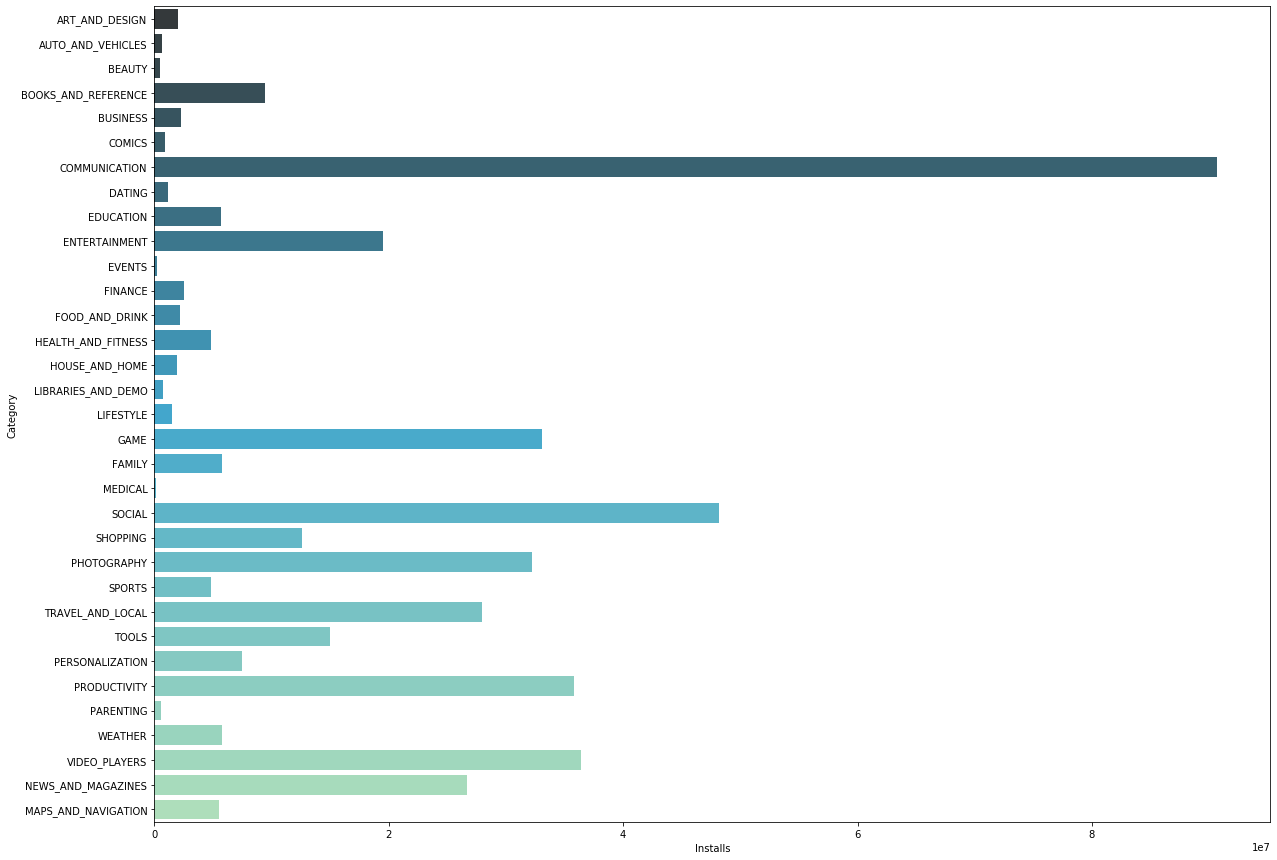

In [0]:
plt.figure(figsize=(20, 15))
sns.barplot(y = df["Category"], x = df_free["Installs"], ci = None, saturation=1, palette = "GnBu_d")
plt.show()

#### People installed Communicational, Social, Gaming etc categorical apps more often for Free applications.

#### Plotting a bar chart with Y axis as data frame Category and X-axis as number of installs for Paid application data frame

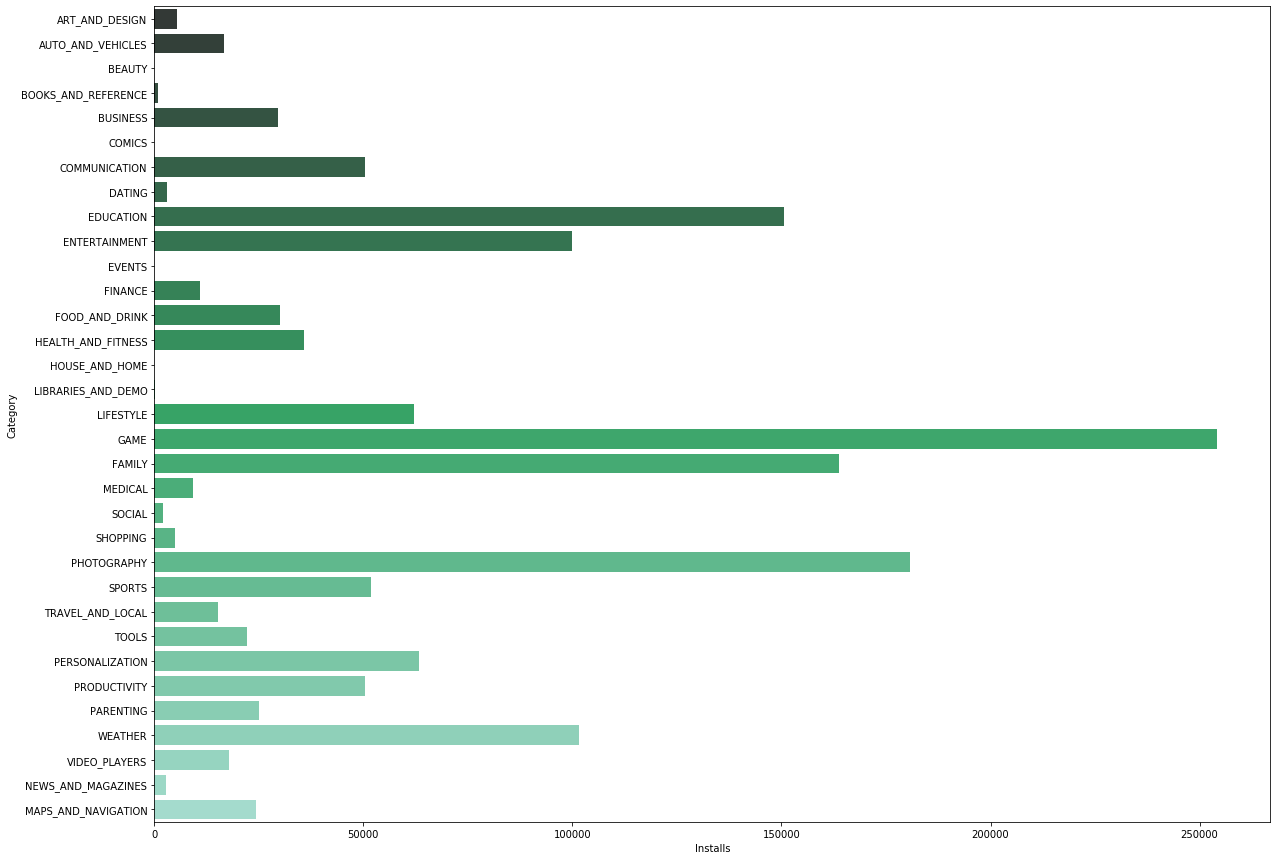

In [0]:
plt.figure(figsize=(20, 15))
sns.barplot(y = df["Category"], x = df_paid["Installs"], ci = None, saturation=1, palette = "BuGn_d")
plt.show()

#### People installed Gaming, Photography, Family, Educational etc categorical apps more often for Paid applications.

#### This information can be very helpful for application development firms to choose on which categorical application they should focus more to achive market gain.